# Support Vector Machines 

___

## Data

## [Fraud in Wine](https://en.wikipedia.org/wiki/Wine_fraud)

Wine fraud relates to the commercial aspects of wine. The most prevalent type of fraud is one where wines are adulterated, usually with the addition of cheaper products (e.g. juices) and sometimes with harmful chemicals and sweeteners (compensating for color or flavor).

Counterfeiting and the relabelling of inferior and cheaper wines to more expensive brands is another common type of wine fraud.

<img src="wine.jpg">

## Project Goals

A distribution company that was recently a victim of fraud has completed an audit of various samples of wine through the use of chemical analysis on samples. The distribution company specializes in exporting extremely high quality, expensive wines, but was defrauded by a supplier who was attempting to pass off cheap, low quality wine as higher grade wine. The distribution company has hired you to attempt to create a machine learning model that can help detect low quality (a.k.a "fraud") wine samples. They want to know if it is even possible to detect such a difference.


Data Source: *P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.*

---
---

## Import the Libraries


In [5]:
#Data Manipulations
import numpy as np
import pandas as pd

#Data Visualizations
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

#Style Visualizations
%matplotlib inline
plt.style.use('ggplot')
sns.set_style('whitegrid')
rcParams['figure.figsize'] = (12,6)

## Load the Data

In [8]:
df = pd.read_csv("../wine_fraud.csv")

In [9]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [18]:
df.shape

(6497, 13)

In [19]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


## Exploratory Data Analysis

**What are the unique variables in the target column to predict (quality)?**

In [10]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

**Create a countplot that displays the count per category of Legit vs Fraud. Is the label target balanced or not?**

<AxesSubplot: xlabel='quality', ylabel='count'>

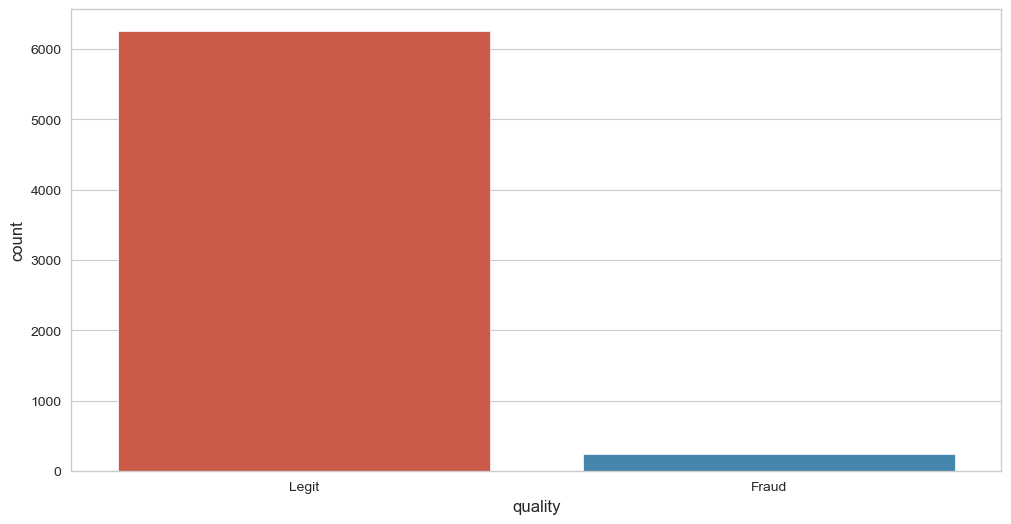

In [12]:
sns.countplot(df, x='quality')

**Let's find out if there is a difference between red and white wine when it comes to fraud. Create a countplot that has the wine 'type' on the x axis with the hue separating columns by Fraud vs Legit.**

<AxesSubplot: xlabel='type', ylabel='count'>

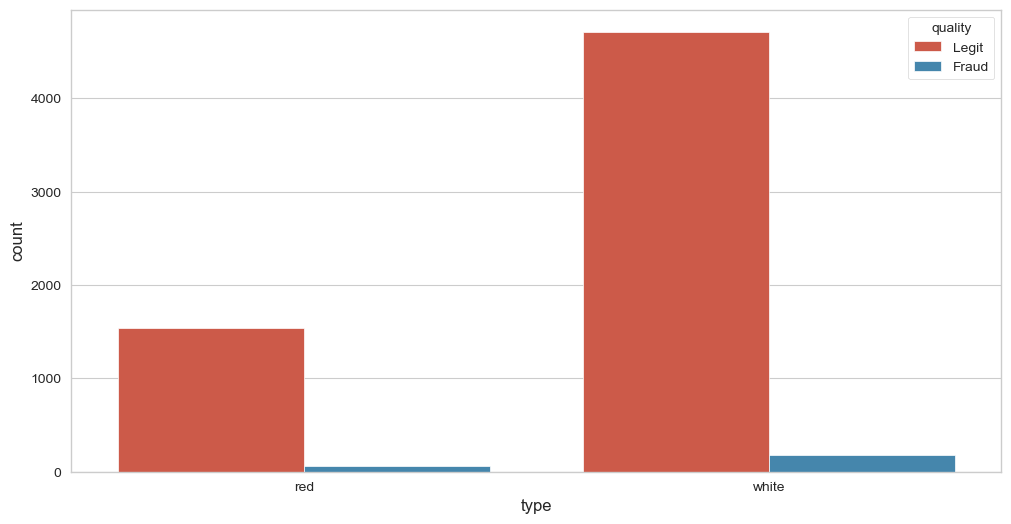

In [13]:
sns.countplot(df, x='type', hue='quality')

**What percentage of red wines are Fraud?**

In [14]:
reds = df[df['type'] == 'red']

In [15]:
print("Percentage of fraud in Red Wines:")
print(100*(len(reds[reds['quality'] == 'Fraud'])/len(reds)))

Percentage of fraud in Red Wines:
3.9399624765478425


**What percentage of white wines are fraud?**

In [16]:
whites = df[df['type'] == 'white']

In [17]:
print("Percentage of fraud in White Wines")
print(100*(len(whites[whites['quality'] == 'Fraud'])/len(whites)))

Percentage of fraud in White Wines
3.7362188648427925


**Calculate the correlation between the various features and the 'quality' column. Separate to 0 and 1 instead of string.**

In [21]:
df['Fraud'] = df['quality'].map({'Legit':0, 'Fraud':1})

In [22]:
df.corr()['Fraud']

fixed acidity           0.021794
volatile acidity        0.151228
citric acid            -0.061789
residual sugar         -0.048756
chlorides               0.034499
free sulfur dioxide    -0.085204
total sulfur dioxide   -0.035252
density                 0.016351
pH                      0.020107
sulphates              -0.034046
alcohol                -0.051141
Fraud                   1.000000
Name: Fraud, dtype: float64

**Create a bar plot of the correlation values to Fraud column.**

<AxesSubplot: >

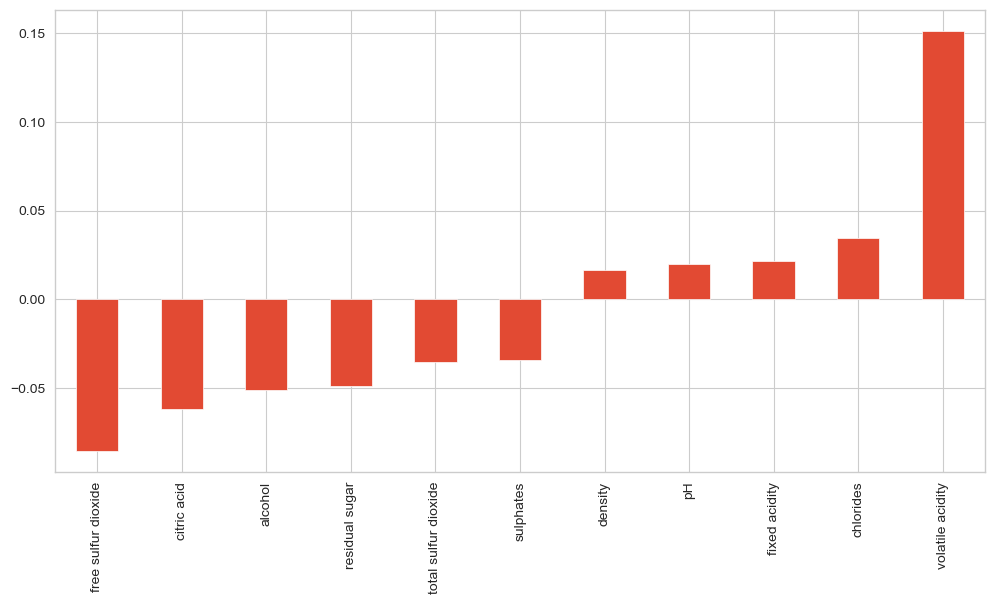

In [25]:
df.corr()['Fraud'][:-1].sort_values().plot(kind='bar')

**Create a clustermap with seaborn to explore the relationships between variables.**

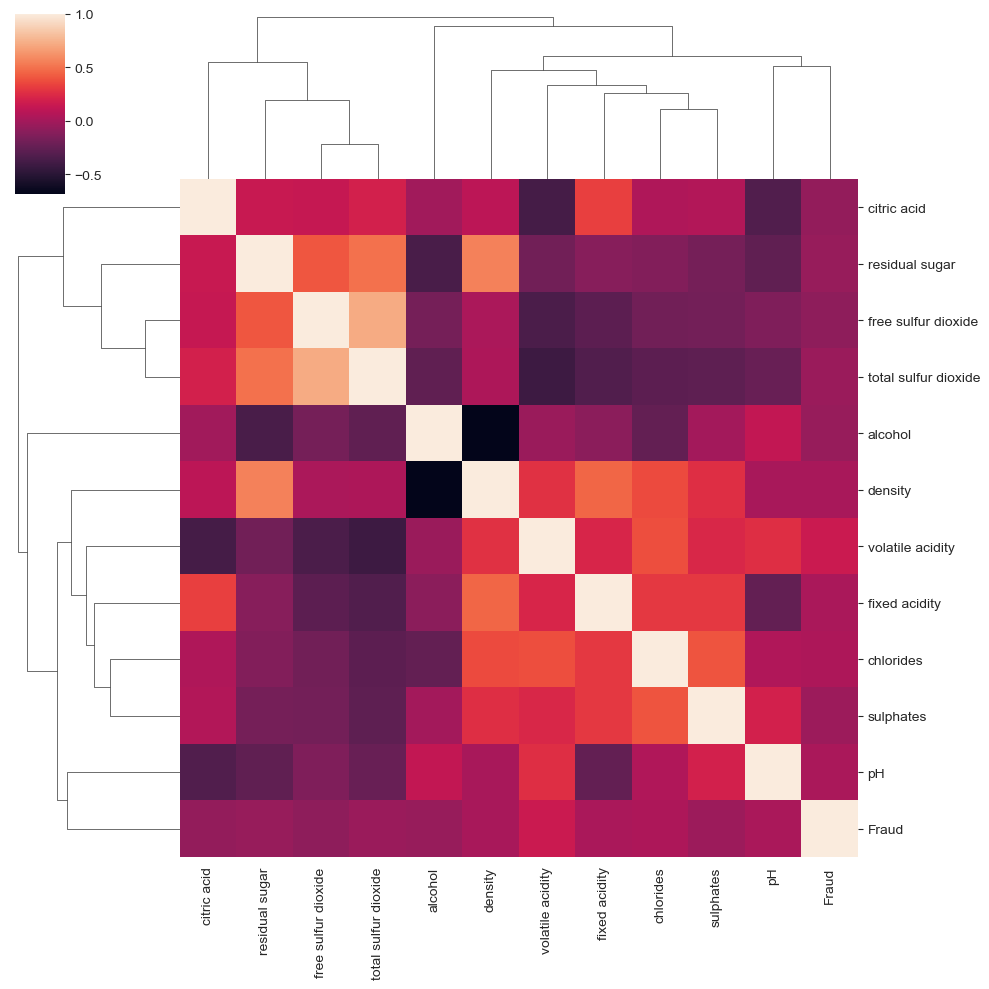

In [26]:
sns.clustermap(df.corr())

## Machine Learning Model

___

**Convert the categorical column 'type' from a string or 'red' or 'white' to dummy variables:**

In [27]:
df['type'] = pd.get_dummies(df['type'], drop_first=True)

In [28]:
df = df.drop('Fraud', axis=1)

### Train Test Split

**Separate out the data into X features and y target label 'quality' column.**

In [29]:
X = df.drop('quality', axis=1)
y = df['quality']

**Split up the data into a training set and test set. Set test_size=0.3 to 30% samples data and random_state=101.**

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Train a Model

**Scale the X train and X test data.**

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

In [34]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

**Create an instance of a SVC() model.**

In [35]:
from sklearn.svm import SVC

In [36]:
svc = SVC(class_weight='balanced')

## GridSearch

**Use a GridSearchCV to run a grid search for the best C and gamma parameters.**

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1], 'gamma':['scale','auto']}

In [39]:
grid_cv_model = GridSearchCV(svc,param_grid,verbose=2)

In [41]:
grid_cv_model.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...............................C=0.001, gamma=scale; total time=   2.2s
[CV] END ...............................C=0.001, gamma=scale; total time=   2.4s
[CV] END ...............................C=0.001, gamma=scale; total time=   2.8s
[CV] END ...............................C=0.001, gamma=scale; total time=   2.9s
[CV] END ...............................C=0.001, gamma=scale; total time=   2.8s
[CV] END ................................C=0.001, gamma=auto; total time=   2.5s
[CV] END ................................C=0.001, gamma=auto; total time=   2.6s
[CV] END ................................C=0.001, gamma=auto; total time=   2.7s
[CV] END ................................C=0.001, gamma=auto; total time=   2.6s
[CV] END ................................C=0.001, gamma=auto; total time=   2.7s
[CV] END ................................C=0.01, gamma=scale; total time=   2.5s
[CV] END ................................C=0.01,

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']},
             verbose=2)

In [42]:
grid_cv_model.best_estimator_

SVC(C=1, class_weight='balanced')

In [43]:
grid_cv_model.best_params_

{'C': 1, 'gamma': 'scale'}

In [44]:
grid_cv_model.best_score_

0.8537506497902537

## Predicting Test Data Sets

**Predict off the X_test set of the data.**

In [46]:
gridcv_pred = grid_cv_model.predict(scaled_X_test)

In [47]:
gridcv_pred

array(['Legit', 'Fraud', 'Legit', ..., 'Legit', 'Legit', 'Legit'],
      dtype=object)

## Evaluating the Model

**Create a Classification Report, Confusion Matrix Array.**

In [45]:
from sklearn.metrics import confusion_matrix, classification_report

In [48]:
confusion_matrix(y_test, gridcv_pred)

array([[  42,   22],
       [ 256, 1630]], dtype=int64)

In [51]:
print(classification_report(y_test, gridcv_pred))

              precision    recall  f1-score   support

       Fraud       0.14      0.66      0.23        64
       Legit       0.99      0.86      0.92      1886

    accuracy                           0.86      1950
   macro avg       0.56      0.76      0.58      1950
weighted avg       0.96      0.86      0.90      1950

